<a href="https://colab.research.google.com/github/sidra3921/stock-price-forecasting-sidra2225165138/blob/main/Week2_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📅 Week 2 – Data Cleaning
**Name:** Sidra  
**Project:** Stock Price Forecasting (Apple Dataset)  
**Course:** Applied Data Science with AI  


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()   # yahan kaggle.json upload karo
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025 -p data/raw
!unzip -o data/raw/10-year-daily-stock-data-of-apple-2015-to-2025.zip -d data/raw
!ls data/raw


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 305MB/s]
Archive:  data/raw/10-year-daily-stock-data-of-apple-2015-to-2025.zip
  inflating: data/raw/apple_stock_10years_daywise.xlsx  
10-year-daily-stock-data-of-apple-2015-to-2025.zip
apple_stock_10years_daywise.xlsx


In [ ]:
!mkdir -p data/raw


In [ ]:
# CELL A - basic setup (run once)
!pip install --quiet pandas openpyxl

import os
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/cleaned', exist_ok=True)
os.makedirs('reports', exist_ok=True)
print("Setup ready. Folders created: data/raw, data/cleaned, reports")


Setup ready. Folders created: data/raw, data/cleaned, reports


In [ ]:
# CELL B - Upload the Excel file from your computer
from google.colab import files
print("Select and upload your Excel file (apple_stock_10years_daywise.xlsx).")
uploaded = files.upload()
# This will place the file in the current Colab working directory
print("Uploaded files:", list(uploaded.keys()))


Select and upload your Excel file (apple_stock_10years_daywise.xlsx).


Saving kaggle.json to kaggle.json
Uploaded files: ['kaggle.json']


In [ ]:
# CELL 3 - download dataset from Kaggle (example slug)
# Replace slug if you choose different dataset on Kaggle
!kaggle datasets download -d yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025 -p data/raw --unzip

# list files we downloaded
!ls -lah data/raw


Dataset URL: https://www.kaggle.com/datasets/yousufshah/10-year-daily-stock-data-of-apple-2015-to-2025
License(s): apache-2.0
10-year-daily-stock-data-of-apple-2015-to-2025.zip: Skipping, found more recently modified local copy (use --force to force download)
total 240K
drwxr-xr-x 2 root root 4.0K Oct 27 16:19 .
drwxr-xr-x 4 root root 4.0K Oct 27 16:23 ..
-rw-r--r-- 1 root root 114K Apr 13  2025 10-year-daily-stock-data-of-apple-2015-to-2025.zip
-rw-r--r-- 1 root root 116K Apr 13  2025 apple_stock_10years_daywise.xlsx


In [ ]:
# 📦 Libraries install karna (agar pehle nahi ki)
!pip install pandas matplotlib openpyxl

# 📥 Import karna
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 📁 File ka path
file_path = "data/raw/apple_stock_10years_daywise.xlsx"

# 📊 File read karna
df = pd.read_excel(file_path)

# 👀 First 5 rows dekhna
df.head()


,Date,Close,High,Low,Open,Volume
0,2015-04-13,28.33,28.71,28.28,28.67,145460400
1,2015-04-14,28.21,28.43,28.12,28.36,102098400
2,2015-04-15,28.31,28.39,28.14,28.23,115881600
3,2015-04-16,28.18,28.38,28.16,28.20,113476000
4,2015-04-17,27.86,28.17,27.80,28.04,207828000


In [ ]:
# Shape of dataset
print("Shape before cleaning:", df.shape)

# Column info
df.info()

# Missing values check
print("\nMissing Values:\n", df.isnull().sum())

# Duplicate rows check
print("\nDuplicate Rows:", df.duplicated().sum())

# Basic statistics
print("\nDescribe:\n", df.describe())


Shape before cleaning: (2517, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   High    2517 non-null   float64       
 3   Low     2517 non-null   float64       
 4   Open    2517 non-null   float64       
 5   Volume  2517 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB

Missing Values:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Duplicate Rows: 0

Describe:
                                 Date        Close         High          Low  \
count                           2517  2517.000000  2517.000000  2517.000000   
mean   2020-04-09 06:31:19.380214272    99.638741   100.633917    98.532292   
min              2015-04-13 00:00:00    20.670000    20.980000    2

In [ ]:
# Duplicate rows remove karo
df = df.drop_duplicates()

print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (2517, 6)


In [ ]:
df = df.dropna()


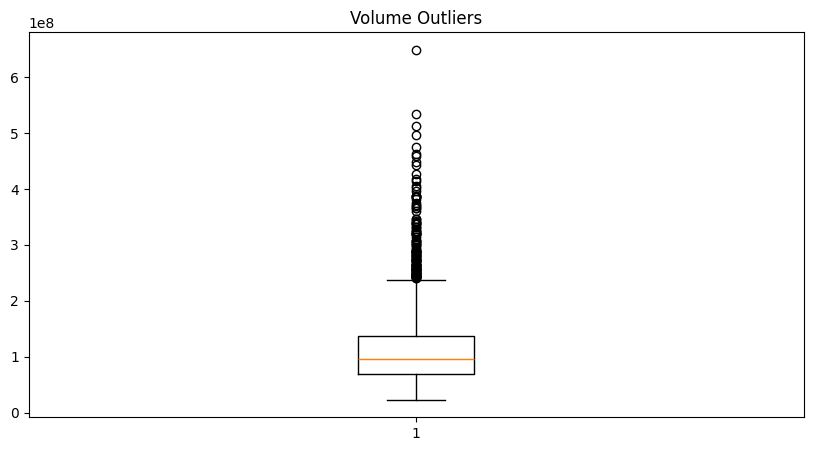

In [ ]:
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(10,5))
plt.boxplot(df['Volume'])
plt.title('Volume Outliers')
plt.show()


In [ ]:
# Cleaned dataset save karo
df.to_csv('apple_stock_cleaned_week2.csv', index=False)

print("Cleaned dataset saved successfully ✅")


Cleaned dataset saved successfully ✅


before_shape = (2517, 6)  # Week 1 shape
after_shape = df.shape
duplicates_removed = 0    # agar koi duplicate remove kiye
missing_values = 0        # missing values count
outliers_removed =  X     # agar remove kiye

report = f"""
📊 Before Cleaning:
Rows, Columns: {before_shape}

🧼 After Cleaning:
Rows, Columns: {after_shape}

🔸 Duplicates Removed: {duplicates_removed}
🔸 Missing Values Handled: {missing_values}
🔸 Outliers Removed: {outliers_removed}

Dataset successfully cleaned.
"""
print(report)
